<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

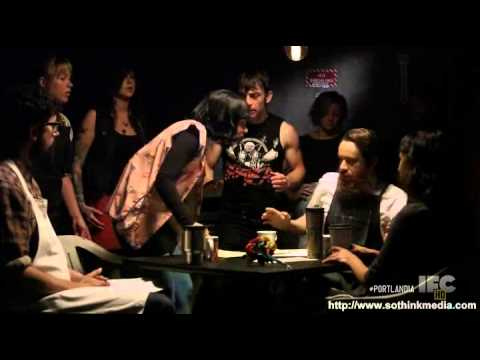

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [4]:
import re

def tokenize(text):
    non_alpha = '[^a-zA-z ]'
    replace_with = ""
    clean_text = re.sub(non_alpha, replace_with, text)
    
    clean_tokens = clean_text.lower().split()
    
    return clean_tokens

In [5]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [6]:
shops

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[i, actually, step, into, this, restaurant, by..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[ok, the, steeping, room, is, awesome, how, do..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[loved, coming, here, for, tea, and, the, atmo..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,"[the, food, is, just, average, the, booths, di..."


In [7]:
def clean_rating(rating):
    non_num = '[a-zA-Z ]'
    replace_with = ""
    clean_text = re.sub(non_num, replace_with, rating)
    return clean_text

In [8]:
shops['star_rating'] = shops['star_rating'].apply(clean_rating).astype(float)

In [9]:
shops

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[checkin, they, are, located, within, the, nor..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0,"[i, actually, step, into, this, restaurant, by..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0,"[ok, the, steeping, room, is, awesome, how, do..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0,"[loved, coming, here, for, tea, and, the, atmo..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0,"[the, food, is, just, average, the, booths, di..."


In [10]:
from collections import Counter

word_counter = Counter()

shops["tokens"].apply(lambda token: word_counter.update(token));

word_counter.most_common(20)

[('the', 34807),
 ('and', 26650),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8679),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426)]

In [11]:
def count(tokens):
    
    word_counts = Counter()
    
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens: 
        word_counts.update(token)
        appears_in.update(set(token))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)
 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

In [12]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,6847,34807,1.0,4.540782,4.540782,89.902836
45,and,6864,26650,2.0,3.476652,8.017434,90.126050
25,a,6246,22756,3.0,2.968657,10.986091,82.011555
11,i,5532,20249,4.0,2.641603,13.627694,72.636555
1,to,5653,17164,5.0,2.239147,15.866841,74.225315


In [13]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19874,roomier,1,1,19876.0,0.00013,99.999478,0.01313
19875,windowed,1,1,19877.0,0.00013,99.999609,0.01313
19876,actuality,1,1,19878.0,0.00013,99.999739,0.01313
19877,crass,1,1,19879.0,0.00013,99.999870,0.01313
19878,digestion,1,1,19880.0,0.00013,100.000000,0.01313


In [16]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=26a0afedd895a1e22caa224687be33669660893afb91635d3137bef38e3c9185
  Stored in directory: /tmp/pip-ephem-wheel-cache-qr2mb2kf/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [18]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
# import spacy
# from spacy.tokenizer import Tokenizer
# from nltk.stem import PorterStemmer

# nlp = spacy.load('en_core_web_lg')

In [19]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','', 'coffee', 'place', "i'm", "it's", 'good', 'like', "check-in", '-', '1', '$' ])

In [20]:
tokens = []
for doc in nlp.pipe(shops['full_review_text']):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.is_digit == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

shops['tokens'] = tokens


In [21]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, check, love, love, loved, atmosph..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night, austin, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, check, listed, brunch, spots, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, check, located, northcross, mall, ..."


In [22]:
shop_good = shops[shops['star_rating'] > 3]
shop_bad = shops[shops['star_rating'] <= 3]

In [23]:
good_wc = count(shop_good['tokens'])
bad_wc = count(shop_bad['tokens'])

In [24]:
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
143,great,2499,3467,1.0,1.305553,1.305553,40.700326
2,check,2654,2852,2.0,1.073965,2.379518,43.224756
52,austin,1586,2043,3.0,0.769323,3.148841,25.830619
10,love,1323,1734,4.0,0.652965,3.801806,21.547231
170,friendly,1426,1499,5.0,0.564472,4.366278,23.224756


In [26]:
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
106,check,475,505,1.0,0.685359,0.685359,32.181572
59,food,318,497,2.0,0.674502,1.359861,21.544715
224,time,358,484,3.0,0.656859,2.016720,24.254743
158,great,344,466,4.0,0.632430,2.649150,23.306233
17,service,346,448,5.0,0.608002,3.257152,23.441734


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [28]:
!python -m squarify install

/usr/bin/python3: No module named squarify


In [27]:
import squarify
import matplotlib.pyplot as plt

good_wc_top10 = good_wc[good_wc['rank'] <= 10]

squarify.plot(sizes=good_wc_top10['pct_total'], label=good_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()


bad_wc_top10 = bad_wc[bad_wc['rank'] <= 10]

squarify.plot(sizes=bad_wc_top10['pct_total'], label=bad_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

ModuleNotFoundError: ignored

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

